In [7]:
import json
import csv
import pandas as pd
import numpy as np

%matplotlib inline
import re
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from snowballstemmer import stemmer
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns
import string
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('preprocessed_df.csv', sep='\t')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Unnamed: 0.1", axis=1, inplace=True)
df

,Place,Description,Tourism
0,SÜMELA MANASTIRI,sümela manastırı meryem ana manastırı nerededi...,İnanç
1,IHLARA VADİSİ,tarihi kaynaklardaki adı peristremma olan ihla...,Doğa
2,DARA ANTİK KENTİ,dara antik kenti mardin’in 30 kilometre güneyd...,Kültür
3,KIZ KALESİ,deniz kalesi olarak bilinen kız kalesi adını v...,Kültür
4,TİTUS TÜNELİ VE BEŞİKLİ MAĞARA,hatayın samandağ i lçesi çevlik örenyeri yakın...,Doğa
...,...,...,...
3266,YÜZBAŞISUYU ÇEŞMESİ,sel değirmeni mahallesi yüzbaşısuyu sokak’ta y...,Kültür
3267,YEDİKUYULAR KAYAK MERKEZİ,kahramanmaraş ili dulkadiroğlu ilçesi yedikuyu...,Kış
3268,SALDA GÖLÜ,salda gölü burdur’un yaklaşık 64 km batısında ...,Doğa
3269,ANKARA KALESİ,ankara’nın sembollerinden olan ankara kalesi’n...,Kültür


In [5]:
X = df.Description
y = df.Tourism
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(2289,)
(982,)


In [6]:
np.unique(df['Tourism'])

array(['Doğa', 'Kültür', 'Kış', 'Termal', 'İnanç'], dtype=object)

Precision: 0.5242
Recall: 0.5056
Accuracy: 0.8534
F1 Score: 0.5129
              precision    recall  f1-score   support

        Doğa       0.92      0.77      0.84       221
      Kültür       0.81      0.91      0.86       476
         Kış       0.00      0.00      0.00         3
      Termal       0.00      0.00      0.00         6
       İnanç       0.88      0.84      0.86       276

    accuracy                           0.85       982
   macro avg       0.52      0.51      0.51       982
weighted avg       0.85      0.85      0.85       982



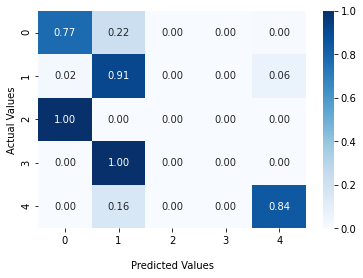

In [7]:
lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

In [8]:
np.unique(df['Tourism'])

array(['Doğa', 'Kültür', 'Kış', 'Termal', 'İnanç'], dtype=object)

<AxesSubplot:xlabel='Tourism', ylabel='count'>

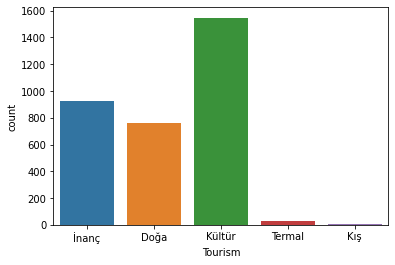

In [9]:
sns.countplot(df['Tourism'])

In [3]:
# verisetini dengeli (balanced) hale getirme

df_termal = df[(df['Tourism']=='Termal')]

termal_upsampled = resample(df_termal, 
                             replace=True,
                             n_samples= len(df[df['Tourism'] == 'Doğa']),
                             random_state=42)


df_kis = df[(df['Tourism']=='Kış')]

kis_upsampled = resample(df_kis, 
                             replace=True,
                             n_samples= len(df[df['Tourism'] == 'Doğa']),
                             random_state=42)


df = pd.concat([termal_upsampled, df])
df = pd.concat([df, kis_upsampled])

<AxesSubplot:xlabel='Tourism', ylabel='count'>

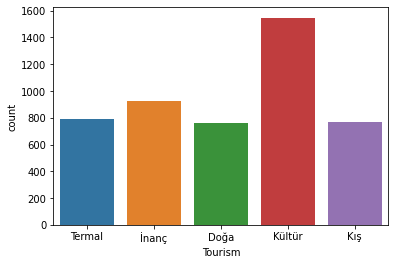

In [4]:
sns.countplot(df['Tourism'])

In [5]:
X = df.Description
y = df.Tourism
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(3350,)
(1437,)


## Logistic Regression

Precision: 0.9321
Recall: 0.9067
Accuracy: 0.9088
F1 Score: 0.9167
              precision    recall  f1-score   support

        Doğa       0.95      0.82      0.88       217
      Kültür       0.81      0.93      0.87       452
         Kış       1.00      1.00      1.00       240
      Termal       1.00      1.00      1.00       248
       İnanç       0.90      0.78      0.83       280

    accuracy                           0.91      1437
   macro avg       0.93      0.91      0.92      1437
weighted avg       0.91      0.91      0.91      1437



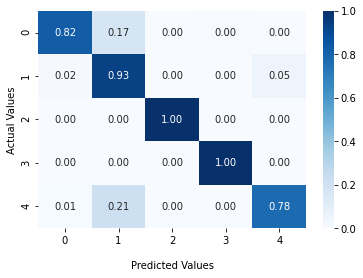

In [8]:
lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

## Naive Bayes

Precision: 0.9122
Recall: 0.8088
Accuracy: 0.8302
F1 Score: 0.8315
              precision    recall  f1-score   support

        Doğa       0.99      0.57      0.73       217
      Kültür       0.66      0.98      0.79       452
         Kış       0.98      1.00      0.99       240
      Termal       0.99      0.97      0.98       248
       İnanç       0.94      0.53      0.67       280

    accuracy                           0.83      1437
   macro avg       0.91      0.81      0.83      1437
weighted avg       0.87      0.83      0.82      1437



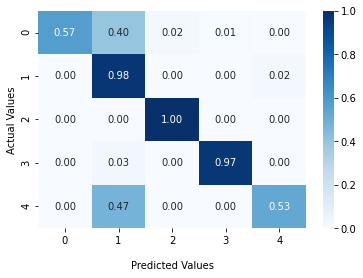

In [9]:
nb = make_pipeline(TfidfVectorizer(), MultinomialNB()).fit(X_train, y_train)
y_pred = nb.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

Precision: 0.9333
Recall: 0.9031
Accuracy: 0.9068
F1 Score: 0.9145
              precision    recall  f1-score   support

        Doğa       0.95      0.82      0.88       217
      Kültür       0.80      0.94      0.87       452
         Kış       1.00      1.00      1.00       240
      Termal       1.00      1.00      1.00       248
       İnanç       0.92      0.76      0.83       280

    accuracy                           0.91      1437
   macro avg       0.93      0.90      0.91      1437
weighted avg       0.91      0.91      0.91      1437



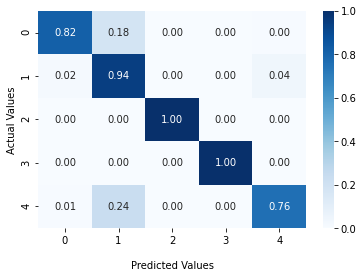

In [10]:
lsvm = make_pipeline(TfidfVectorizer(), SVC()).fit(X_train, y_train)

y_pred = lsvm.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

In [20]:
text = "Buradaki göl ve dağ bir harika."
lsvc.predict([text])

array(['Doğa'], dtype=object)